In [ ]:
pip install researchpy

# Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from imblearn.combine import SMOTETomek
from collections import Counter
import researchpy as rp
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Uploading the dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Balanced-2-F-overlap.csv to Balanced-2-F-overlap.csv


# Reading the dataset

In [ ]:
df=pd.read_csv('Balanced-2-F-overlap.csv')
df.head()

,X1,X2,X3,X4,Y
0,1.127977,1.514858,1.098773,0.605022,0
1,1.316578,1.225637,0.483933,0.621785,0
2,1.864390,1.836977,0.712341,-0.008974,0
3,1.512873,1.766094,0.995498,0.334808,0
4,1.325930,0.992217,0.248931,0.440195,0


# Exploring the data

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')

In [ ]:
df.shape

(300, 5)

In [ ]:
df.describe()

,X1,X2,X3,X4,Y
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.422199,1.027929,0.601950,1.001711,0.500000
std,0.202528,0.485444,0.289579,0.463389,0.500835
min,0.797850,-0.345606,-0.119089,-0.170235,0.000000
25%,1.282966,0.632506,0.412690,0.581652,0.000000
50%,1.426647,1.026183,0.609731,1.145652,0.500000
75%,1.560686,1.409311,0.778780,1.413320,1.000000
max,1.962549,2.114407,1.477847,1.822452,1.000000


In [ ]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
Y     0
dtype: int64

# Statistical and Consistency Analysis

In [ ]:
df['Y'].value_counts()

1    150
0    150
Name: Y, dtype: int64

In [ ]:
df_0 = df[df["Y"] == 0]
df_0.head()

,X1,X2,X3,X4,Y
0,1.127977,1.514858,1.098773,0.605022,0
1,1.316578,1.225637,0.483933,0.621785,0
2,1.864390,1.836977,0.712341,-0.008974,0
3,1.512873,1.766094,0.995498,0.334808,0
4,1.325930,0.992217,0.248931,0.440195,0


In [ ]:
rp.summary_cont(df_0)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,150.0,1.4188,0.2148,0.0175,1.3842,1.4535
1,X2,150.0,1.4065,0.2931,0.0239,1.3592,1.4538
2,X3,150.0,0.5857,0.2566,0.0209,0.5443,0.6270
3,X4,150.0,0.5942,0.2791,0.0228,0.5492,0.6393
4,Y,150.0,0.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_0)

X1    0.045818
X2    0.085320
X3    0.065394
X4    0.077403
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_0)

array([-0.00762192,  0.14378687,  0.02849445, -0.09529035,  0.        ])

In [ ]:
df_1 = df[df["Y"] == 1]
df_1.head()

,X1,X2,X3,X4,Y
150,1.453850,0.836943,0.911658,1.564879,1
151,1.572010,0.852857,0.425309,1.295924,1
152,1.118919,0.275008,0.783071,1.544435,1
153,1.230509,0.454782,1.019821,1.509138,1
154,1.273757,0.563556,1.069066,1.540853,1


In [ ]:
rp.summary_cont(df_1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2003: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:2004: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,X1,150.0,1.4256,0.1902,0.0155,1.3949,1.4563
1,X2,150.0,0.6493,0.3137,0.0256,0.5987,0.7000
2,X3,150.0,0.6182,0.3192,0.0261,0.5667,0.6698
3,X4,150.0,1.4092,0.1366,0.0112,1.3872,1.4312
4,Y,150.0,1.0000,0.0000,0.0000,NaN,NaN


In [ ]:
np.var(df_1)

X1    0.035921
X2    0.097757
X3    0.101228
X4    0.018528
Y     0.000000
dtype: float64

In [ ]:
scipy.stats.skew(df_1)

array([-0.12887557, -0.0585068 ,  0.04665127,  0.17299623,  0.        ])

# No difference is present between the number of instances for classes 0 and 1. Hence, it can be attributed as an balanced dataset.

# Plotting of data points for all the 6 combinations of the different features, in order to visualise overlapping.

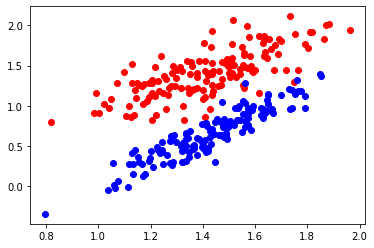

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x2,color='red')
  else:
    plt.scatter(x1,x2,color='blue')
plt.show()

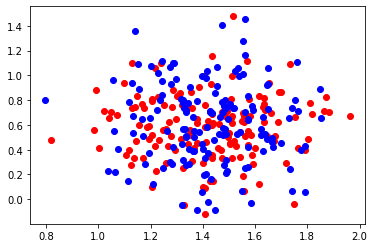

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x3,color='red')
  else:
    plt.scatter(x1,x3,color='blue')
plt.show()

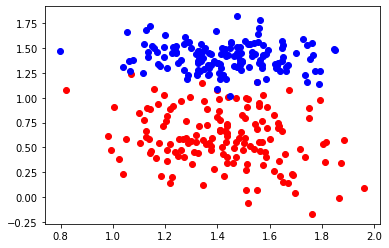

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x1,x4,color='red')
  else:
    plt.scatter(x1,x4,color='blue')
plt.show()

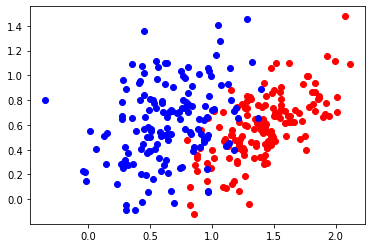

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x3,color='red')
  else:
    plt.scatter(x2,x3,color='blue')
plt.show()

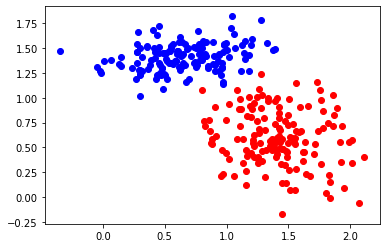

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x2,x4,color='red')
  else:
    plt.scatter(x2,x4,color='blue')
plt.show()

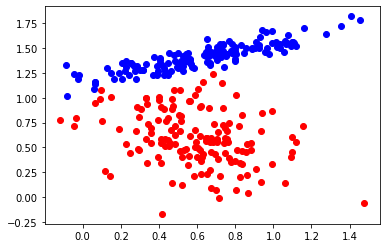

In [ ]:
for i in range(len(df)):
  x1=df.iloc[i,0]
  x2=df.iloc[i,1]
  x3=df.iloc[i,2]
  x4=df.iloc[i,3]
  y=df.iloc[i,4]
  if(y==0):
    plt.scatter(x3,x4,color='red')
  else:
    plt.scatter(x3,x4,color='blue')
plt.show()

# Hence, it can be confirmed from the above scatter plots that x1 overlaps with x3, and x2 overlaps with x3.

# Data Splicing

In [ ]:
x=df.drop('Y',axis=1)
y=df['Y']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

# Decision Tree Clasiifier

In [ ]:
tree = DecisionTreeClassifier()
tree_fit = tree.fit(x_train,y_train)
y_pred = tree_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(tree, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(tree, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(tree, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 0.987

Confusion Matrix : 
 [[35  1]
 [ 0 39]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.97      1.00      0.99        39

    accuracy                           0.99        75
   macro avg       0.99      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75


Accuracy using 10 fold Cross validation =  0.9913043478260869

Precision using 10 fold Cross validation =  0.9833333333333332

Recall using 10 fold Cross validation =  0.9818181818181818


# KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn_fit = knn.fit(x_train,y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(knn, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(knn, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[36  0]
 [ 0 39]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        39

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0


# SVM Classifier

In [ ]:
mod = SVC()
mod_fit = mod.fit(x_train,y_train)
y_pred = mod_fit.predict(x_test)
print("Accuracy Score = %.3f" %accuracy_score(y_test,y_pred))
print("\nConfusion Matrix : \n", confusion_matrix(y_test,y_pred))
print("\nClassification Report : \n", classification_report(y_test,y_pred))
v_acc = cross_val_score(mod, x_train, y_train, cv=10, scoring='accuracy')
v_pre = cross_val_score(mod, x_train, y_train, cv=10, scoring='precision')
v_rec = cross_val_score(mod, x_train, y_train, cv=10, scoring='recall')
print("\nAccuracy using 10 fold Cross validation = ",v_acc.mean())
print("\nPrecision using 10 fold Cross validation = ",v_pre.mean())
print("\nRecall using 10 fold Cross validation = ",v_rec.mean())

Accuracy Score = 1.000

Confusion Matrix : 
 [[36  0]
 [ 0 39]]

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        39

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75


Accuracy using 10 fold Cross validation =  1.0

Precision using 10 fold Cross validation =  1.0

Recall using 10 fold Cross validation =  1.0
